<a href="https://colab.research.google.com/github/crackledsp/Pollution_Prediction_using_LSTM/blob/main/LSTM_Pollution_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False

In [207]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/daily_clean_full.csv")

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_avr      2918 non-null   float64
 1   temp_max      2918 non-null   float64
 2   temp_min      2918 non-null   float64
 3   pres          2918 non-null   float64
 4   u             2918 non-null   float64
 5   v             2918 non-null   float64
 6   prec          2918 non-null   float64
 7   datetime      2918 non-null   object 
 8   Budateteny    2918 non-null   float64
 9   Csepel        2918 non-null   float64
 10  Erzsebet      2918 non-null   float64
 11  Gergely       2918 non-null   float64
 12  Gilice        2918 non-null   float64
 13  Honved        2918 non-null   float64
 14  Kaposztas     2918 non-null   float64
 15  Korakas       2918 non-null   float64
 16  Kosztolanyi   2918 non-null   float64
 17  Pesthidegkut  2918 non-null   float64
 18  Szena         2918 non-null 

In [210]:
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
df['datetime'].head()

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: datetime, dtype: datetime64[ns]

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   temp_avr      2918 non-null   float64       
 1   temp_max      2918 non-null   float64       
 2   temp_min      2918 non-null   float64       
 3   pres          2918 non-null   float64       
 4   u             2918 non-null   float64       
 5   v             2918 non-null   float64       
 6   prec          2918 non-null   float64       
 7   datetime      2918 non-null   datetime64[ns]
 8   Budateteny    2918 non-null   float64       
 9   Csepel        2918 non-null   float64       
 10  Erzsebet      2918 non-null   float64       
 11  Gergely       2918 non-null   float64       
 12  Gilice        2918 non-null   float64       
 13  Honved        2918 non-null   float64       
 14  Kaposztas     2918 non-null   float64       
 15  Korakas       2918 non-null   float64 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f235f996da0>,
      dtype=object)

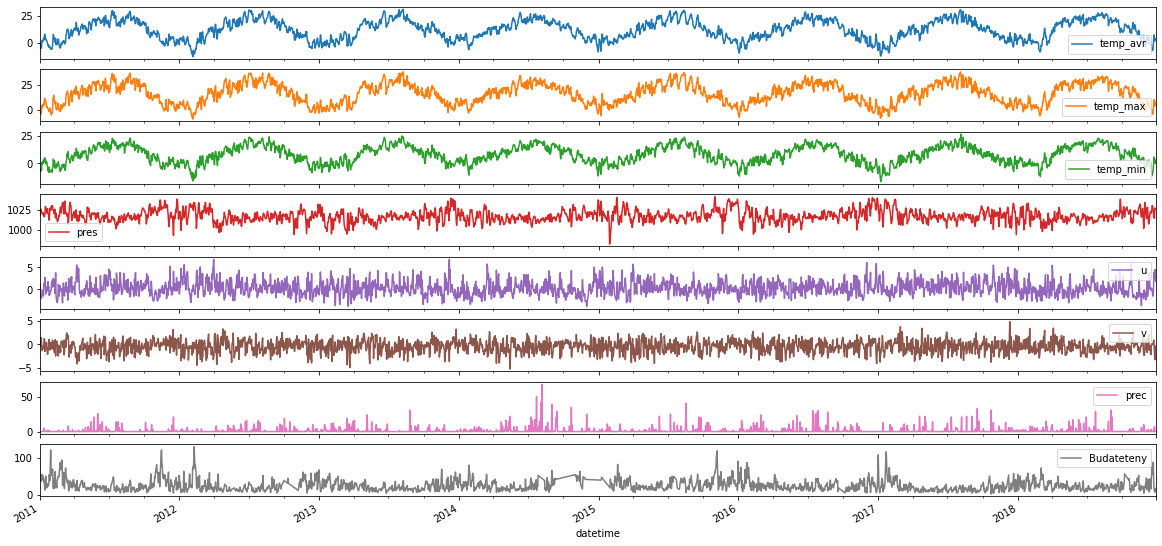

In [212]:
df.set_index('datetime')[['temp_avr', 'temp_max','temp_min', 'pres', 'u', 'v', 'prec','Budateteny']].plot(subplots=True)

# Building Model for Budateteny 

In [213]:
df_input=df[['Budateteny','temp_avr', 'temp_max','temp_min', 'pres', 'u', 'v', 'prec']]

In [214]:
df_input.head()

,Budateteny,temp_avr,temp_max,temp_min,pres,u,v,prec
0,83.0,-3.185714,-1.9,-4.6,1020.360691,0.963806,1.041120,0.0
1,37.0,-1.212500,2.7,-4.7,1017.916448,1.500336,-0.015490,0.0
2,46.0,-4.512500,-1.9,-7.7,1022.382748,-0.426777,-0.461940,0.0
3,38.0,-4.462500,-3.5,-5.5,1025.815799,-0.128941,1.072592,0.0
4,37.0,-4.800000,-4.3,-5.5,1025.599150,-1.841358,1.456059,0.0


In [215]:
df_input.describe()

,Budateteny,temp_avr,temp_max,temp_min,pres,u,v,prec
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,26.104695,12.101243,16.445134,7.855757,1017.227027,0.271481,-0.419457,1.393180
std,15.450426,8.923907,10.188715,7.827295,7.549074,1.624770,1.294674,4.224996
min,2.000000,-12.200000,-9.200000,-16.400000,981.830521,-3.968283,-5.282087,0.000000
25%,15.000000,5.000000,8.100000,1.600000,1012.471061,-0.849982,-1.275954,0.000000
50%,22.000000,12.629167,16.900000,8.100000,1016.719324,0.072961,-0.357204,0.000000
75%,34.000000,19.553125,24.800000,14.400000,1021.437686,1.236929,0.468496,0.400000
max,131.000000,30.850000,38.300000,26.200000,1041.392298,6.842006,4.862748,68.000000


In [216]:
df_input.shape

(2918, 8)

## Scaling the data frame helps the model to be robust to outliners and helps in converging the gradients fast

In [217]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [218]:
data_scaled.shape


(2918, 8)

# Defining features [temp_avr,temp_max,temp_min,pres,u,v,prec] and target variable [Budateteny pollution] 

In [219]:
features=data_scaled
target=data_scaled[:,0]

TimeSeriesGenerator with sample window size =2 

In [220]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.62790698, 0.20939107, 0.15368421, 0.27699531, 0.64689424,
          0.4562403 , 0.62329325, 0.        ],
         [0.27131783, 0.25522648, 0.25052632, 0.27464789, 0.60585712,
          0.50587172, 0.51914075, 0.        ]]]), array([0.34108527]))

We made shuffle value as false to mainatain the sequence of the features observations


In [221]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False) # Splitting data in 80:20 ratio for train and  test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2334, 8), (584, 8), (2334,), (584,))

Considering 3 months observations for predicting the target variable . As our observations are days. 3 months is roughly equal to 90 days. So win_length is 90


In [222]:
win_length=90  # considering 3 months observation data
batch_size=32  # The number of samples to return on each iteratio
num_features=8 # length of the input features value to the neuron
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [223]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 90, 128)           70144     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 90, 128)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 90, 128)           131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 90, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 128)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [224]:
'''Early stopping is a method that allows you to specify an arbitrary large number of 
training epochs and stop training once the model performance stops improving on a hold out validation dataset. '''
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                    patience=2,  # when there is no change in loss for consecutive two epochs then our model then training gets halted
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


71/71 [==============================] - 6s 31ms/step - loss: 0.0230 - mean_absolute_error: 0.1139 - val_loss: 0.0101 - val_mean_absolute_error: 0.0740
Epoch 2/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0810 - val_loss: 0.0096 - val_mean_absolute_error: 0.0748
Epoch 3/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0817 - val_loss: 0.0090 - val_mean_absolute_error: 0.0723
Epoch 4/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0764 - val_loss: 0.0088 - val_mean_absolute_error: 0.0718
Epoch 5/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0752 - val_loss: 0.0086 - val_mean_absolute_error: 0.0706
Epoch 6/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0736 - val_loss: 0.0085 - val_mean_absolute_error: 0.0697
Epoch 7/50
71/71 [===============

In [225]:
model.evaluate_generator(test_generator, verbose=0) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.005815037991851568, 0.055965445935726166]

In [226]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [227]:
predictions.shape #Scaled predictions

(494, 1)

In [228]:
y_test.shape

(584,)

In [229]:
x_test.shape

(584, 8)

In [230]:
x_test[:,1:][win_length:]

array([[0.69850949, 0.67789474, 0.62441315, ..., 0.47643425, 0.34649787,
        0.        ],
       [0.68621758, 0.67368421, 0.63615023, ..., 0.51834348, 0.42557313,
        0.        ],
       [0.68147503, 0.66526316, 0.63849765, ..., 0.50981541, 0.42214083,
        0.        ],
       ...,
       [0.33391405, 0.27368421, 0.40140845, ..., 0.68825928, 0.19620696,
        0.        ],
       [0.37979094, 0.31157895, 0.4600939 , ..., 0.78063742, 0.3279242 ,
        0.        ],
       [0.3728223 , 0.34947368, 0.38732394, ..., 0.537063  , 0.48575022,
        0.00147059]])

In [231]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [232]:
df_pred

,0,0,1,2,3,4,5,6
0,0.088649,0.698509,0.677895,0.624413,0.635516,0.476434,0.346498,0.000000
1,0.095710,0.686218,0.673684,0.636150,0.626469,0.518343,0.425573,0.000000
2,0.091635,0.681475,0.665263,0.638498,0.614624,0.509815,0.422141,0.000000
3,0.088900,0.723964,0.766316,0.612676,0.627215,0.367833,0.574467,0.000000
4,0.110006,0.821429,0.852632,0.734742,0.624417,0.327917,0.578503,0.000000
...,...,...,...,...,...,...,...,...
489,0.209914,0.457220,0.410526,0.518779,0.638220,0.729180,0.519096,0.000000
490,0.093854,0.387437,0.347368,0.417840,0.542996,0.603944,0.338073,0.102941
491,0.085086,0.333914,0.273684,0.401408,0.760492,0.688259,0.196207,0.000000
492,0.110413,0.379791,0.311579,0.460094,0.754523,0.780637,0.327924,0.000000


In [233]:
rev_trans=scaler.inverse_transform(df_pred) # Doing inverse transform to descale the observations

In [234]:
rev_trans

array([[13.43572737, 17.87083333, 23.        , ...,  1.18210882,
        -1.76692337,  0.        ],
       [14.34661235, 17.34166667, 22.8       , ...,  1.63515964,
        -0.96471789,  0.        ],
       [13.82095392, 17.1375    , 22.4       , ...,  1.54296872,
        -0.99953798,  0.        ],
       ...,
       [12.97607227,  2.175     ,  3.8       , ...,  3.47199859,
        -3.29159989,  0.        ],
       [16.24331352,  4.15      ,  5.6       , ...,  4.47063298,
        -1.9553502 ,  0.        ],
       [18.15816073,  3.85      ,  7.4       , ...,  1.83752303,
        -0.35423121,  0.1       ]])

In [235]:
df_final=df_input[predictions.shape[0]*-1:]

In [236]:
df_final.count()

Budateteny    494
temp_avr      494
temp_max      494
temp_min      494
pres          494
u             494
v             494
prec          494
dtype: int64

In [237]:
df_final['Prediction']=rev_trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
df_final.tail()

,Budateteny,temp_avr,temp_max,temp_min,pres,u,v,prec,Prediction
2913,15.0,7.483333,10.3,5.7,1019.844067,3.914364,-0.015945,0.0,29.078856
2914,11.0,4.479167,7.3,1.4,1014.172311,2.560526,-1.852389,7.0,14.107180
2915,7.0,2.175000,3.8,0.7,1027.126803,3.471999,-3.291600,0.0,12.976072
2916,11.0,4.150000,5.6,3.2,1026.771276,4.470633,-1.955350,0.0,16.243314
2917,17.0,3.850000,7.4,0.1,1025.749138,1.837523,-0.354231,0.1,18.158161


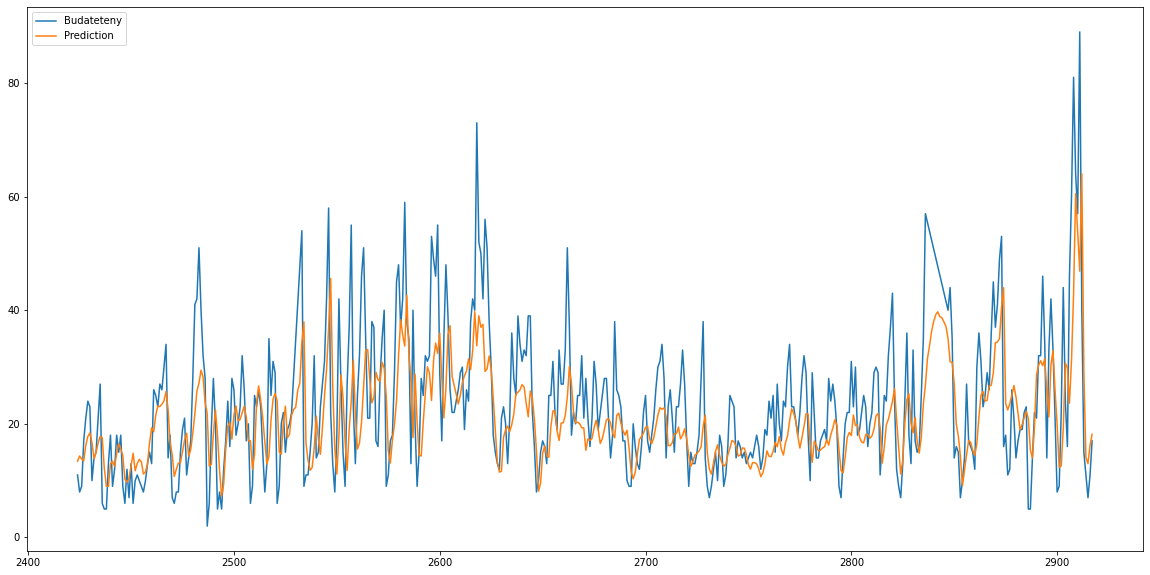

In [239]:
df_final[['Budateteny','Prediction']].plot()  # Predictons on test data